                                     Exploring Bitcoin Network

In [17]:
%matplotlib inline

In [4]:
import quandl as qd
# --> Modify the API key 
qd.ApiConfig.api_key = "mYjt6YMKZ3yfFY5FT-KL"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import praw
from urllib import request
from bs4 import BeautifulSoup
import datetime as dt
import dateutil.relativedelta as dr
import resource, sys
import pandas_datareader.data as web

In [12]:
def get_quandl_data(quandl_code):
        #API call to fetch data
    df = qd.get(quandl_code, start_date='2017-01-01', end_date='2017-11-01', collapse='daily')
        
    return df

In [15]:
qd_data = get_quandl_data('BCHARTS/COINBASEUSD')
qd_data

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2017-04-09,1184.50,1221.00,1175.80,1210.97,5819.871282,6.983405e+06,1199.924263
2017-04-10,1210.99,1219.78,1201.00,1210.00,5644.961476,6.839599e+06,1211.628927
2017-04-11,1210.00,1234.00,1200.00,1223.99,5481.083298,6.673600e+06,1217.569512
2017-04-12,1224.00,1227.86,1209.61,1214.17,6494.151562,7.912585e+06,1218.417052
2017-04-13,1214.68,1219.49,1148.98,1177.05,9426.537457,1.114644e+07,1182.452930
2017-04-14,1177.05,1196.92,1170.14,1173.74,5666.314944,6.700795e+06,1182.566627
2017-04-15,1173.13,1190.99,0.06,1178.85,3972.003146,4.658828e+06,1172.916383
2017-04-16,1178.84,1189.93,1171.70,1177.99,3084.525039,3.644227e+06,1181.454770
2017-04-17,1177.63,1197.60,1170.85,1189.91,6548.066563,7.741935e+06,1182.323765


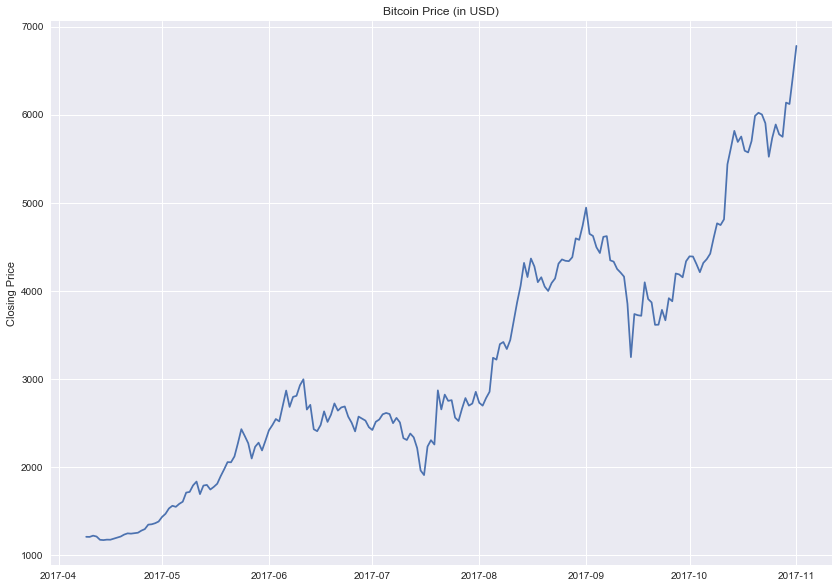

In [18]:
plt.subplots(figsize=(14,10))
plt.plot(qd_data.index, qd_data.Close)
plt.ylabel('Closing Price')
plt.title('Bitcoin Price (in USD)')

In [23]:
# Reddit API Code
# --> Modify the API keys
reddit = praw.Reddit(client_id='Xbd9h7VP6AU7cw',
                     client_secret='JuOtyE1MY2pdINsHL2terCm8C1U',
                     password='Cq130reddit',
                     user_agent='myRedditScriptApp0.1',
                     username='kevalshah90')
print(reddit.user.me())

kevalshah90


In [ ]:
# Work in Progress
# Fetch comments for threads in bitcoin subreddit 
# Filter by date
subreddit = reddit.subreddit('bitcoin')
for comment in subreddit.stream.comments():
    print(comment)